<a href="https://colab.research.google.com/github/yeseul106/Data_Mining/blob/main/DataMining_Week5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [7]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# random_number.csv 파일 읽어오기
random_number = pd.read_csv('/content/drive/MyDrive/강의/데이터마이닝 수업/random_number.csv')
print(random_number.shape)
random_number.head(5)

(9999, 2)


,2,1
0,2,2
1,0,0
2,2,2
3,0,0
4,1,0


**첫번째 열 : Actual Data**

**두번째 열 : Predicated Data**

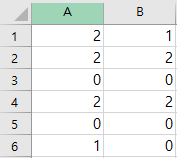

실제 csv 파일을 열어보면 df과 다름.
첫번째 행이 데이터프레임의 index로 잘못 들어가있음.

In [15]:
df =  pd.read_csv('/content/drive/MyDrive/강의/데이터마이닝 수업/random_number.csv', names = ['Actual','Predicted'], header=None) # header 없이 불러오기
print(df.shape)
df.head(5)

(10000, 2)


,Actual,Predicted
0,2,1
1,2,2
2,0,0
3,2,2
4,0,0


In [17]:
# Binary Classification 이 아니므로 몇개의 class 로 분류했는지 파악
print("Actual : ", df['Actual'].unique())
print("Predicted : ", df['Predicted'].unique())

Actual :  [2 0 1]
Predicted :  [1 2 0]


**Confusion Matrix를 만들기 위해 각각의 값 구하기**

N(a,b) = 실제 a 예측 b

In [19]:
N00= N01= N02= N10= N11= N12= N20= N21= N22= 0

for row in range(df.shape[0]):
  if (df['Actual'].iloc[row]==0): # 실제 값 0
    if (df['Predicted'].iloc[row]==0):
      N00 = N00+1
    elif (df['Predicted'].iloc[row]==1):
      N01 = N01+1
    elif (df['Predicted'].iloc[row]==2):
      N02 = N02+1
  elif (df['Actual'].iloc[row]==1): # 실제 값 1
    if (df['Predicted'].iloc[row]==0):
      N10 = N10+1
    elif (df['Predicted'].iloc[row]==1):
      N11 = N11+1
    elif (df['Predicted'].iloc[row]==2):
      N12 = N12+1
  elif (df['Actual'].iloc[row]==2): # 실제 값 2
    if (df['Predicted'].iloc[row]==0):
      N20 = N20+1
    elif (df['Predicted'].iloc[row]==1):
      N21 = N21+1
    elif (df['Predicted'].iloc[row]==2):
      N22 = N22+1

print("N00 : ", N00)
print("N01 : ", N01)
print("N02 : ", N02)
print("N10 : ", N10)
print("N11 : ", N11)
print("N12 : ", N12)
print("N20 : ", N20)
print("N21 : ", N21)
print("N22 : ", N22)

N00 :  6847
N01 :  0
N02 :  0
N10 :  1559
N11 :  0
N12 :  0
N20 :  0
N21 :  745
N22 :  849


In [20]:
# count가 잘 되었는지 확인
print("total sum : ", N00 + N01+ N02 + N10 + N11 + N12 + N20 + N21 + N22)

total sum :  10000


# **1) 3 x 3 confusion 매트릭스**

In [21]:
# confusion matrix 만들기
confusion_matrix = pd.DataFrame({'예측 0':[N00, N10, N20],
                                 '예측 1':[N01, N11, N21],
                                 '예측 2':[N02, N12, N22]}, index = ['실제 0', '실제 1', '실제 2'])
confusion_matrix

,예측 0,예측 1,예측 2
실제 0,6847,0,0
실제 1,1559,0,0
실제 2,0,745,849


# **2) Accuracy, Error 구하기**

**n = 10000**

In [22]:
# Accuracy
accuracy = ( N00 + N11 + N22 ) / df.shape[0]
print("accuracy : ", accuracy)

accuracy :  0.7696


In [23]:
# Error
error = ( N01 + N02 + N10 + N12 + N20 + N21 ) / df.shape[0]
print("error : ", error)

error :  0.2304


In [24]:
# Accuracy + error = 1 인지 확인하기
print("accuracy + error : " , accuracy + error)

accuracy + error :  1.0
